## Notebook to create dataset for Sketch + Text image retrieval using Visual Genome image and annotations

In [1]:
import json
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

def show_pil_img(img, title=None):
    """
    Gets PIL image as input and plots it
    """
    plt.figure()
    if title:
        plt.title(title)
    plt.imshow(img)

In [2]:

IMG_DIR = "/home/trevant/DL4CV/project_datasets/VG_ALL"
OBJECT_ATTRIBUTES_PATH = '/home/trevant/DL4CV/project_datasets/attributes.json'
SKETCHES_PATH = "/home/trevant/DL4CV/project_datasets/imagenet-sketch"

with open(OBJECT_ATTRIBUTES_PATH, 'r') as fp:
    obj_attributes_data = json.load(fp)

In [3]:
object_to_wordnet_list = json.load(open('/home/trevant/DL4CV/dl4cv_project/data/sbir_obj_wordnet_id.json'))

# object names which are in the list
sketch_categories = list(object_to_wordnet_list.keys())
print(sketch_categories)

['airplane', 'banana', 'bear', 'bench', 'bicycle', 'car', 'cat', 'chair', 'couch', 'cup', 'dog', 'elephant', 'pizza', 'spoon', 'umbrella', 'zebra', 'hat', 'tie', 'bottle', 'vase']


In [13]:
# Attribute dataset

MIN_WIDTH_HEIGHT = 224
ATTRIBUTES_DATASET = []
# number_of_images = 1000
number_of_images = len(obj_attributes_data)

for i in range(number_of_images):
    img_data = obj_attributes_data[i]
    img_id = img_data['image_id']

    # iterating over all objects
    for object_attribute in img_data['attributes']:
        x = object_attribute['x']
        y = object_attribute['y']
        h = object_attribute['h']
        w = object_attribute['w']

        # removing very small crops
        if w < MIN_WIDTH_HEIGHT or h < MIN_WIDTH_HEIGHT:
            continue
 
        if 'attributes' not in object_attribute.keys():
            # print("Attributes not annotated for the object")
            # moving to next object
            continue

        attributes = object_attribute['attributes']
        names = object_attribute['names']

        for obj_name in names:
            if obj_name in sketch_categories:
                data_point = {}
                data_point['query_category'] = obj_name
                data_point['region'] = {}
                
                query_text = " ".join(attributes)
                data_point["query_text"] = query_text
                data_point['region']["x"] = x
                data_point['region']["y"] = y
                data_point['region']["w"] = w
                data_point['region']["h"] = h
                data_point["img_id"] = img_id

                ## adding sketch image path too
                wordnet_of_object_category = object_to_wordnet_list[obj_name]
                category_imgs_dir = os.path.join(SKETCHES_PATH, wordnet_of_object_category)
                query_imgs_list = os.listdir(category_imgs_dir)
                
                # adding first 10 sketches
                for query_img_file in query_imgs_list[:10]:
                    query_img_path = os.path.join(wordnet_of_object_category, query_img_file)
                    data_point["query_sketch"] = query_img_path
                    ## Adding sketch path completed

                    ATTRIBUTES_DATASET.append(data_point) 

In [14]:
# to check
print(len(ATTRIBUTES_DATASET))
ATTRIBUTES_DATASET[:5]

89910


[{'query_category': 'chair',
  'region': {'x': 244, 'y': 186, 'w': 283, 'h': 390},
  'query_text': 'tan empty',
  'img_id': 11,
  'query_sketch': 'n03376595/sketch_29.JPEG'},
 {'query_category': 'chair',
  'region': {'x': 244, 'y': 186, 'w': 283, 'h': 390},
  'query_text': 'tan empty',
  'img_id': 11,
  'query_sketch': 'n03376595/sketch_29.JPEG'},
 {'query_category': 'chair',
  'region': {'x': 244, 'y': 186, 'w': 283, 'h': 390},
  'query_text': 'tan empty',
  'img_id': 11,
  'query_sketch': 'n03376595/sketch_29.JPEG'},
 {'query_category': 'chair',
  'region': {'x': 244, 'y': 186, 'w': 283, 'h': 390},
  'query_text': 'tan empty',
  'img_id': 11,
  'query_sketch': 'n03376595/sketch_29.JPEG'},
 {'query_category': 'chair',
  'region': {'x': 244, 'y': 186, 'w': 283, 'h': 390},
  'query_text': 'tan empty',
  'img_id': 11,
  'query_sketch': 'n03376595/sketch_29.JPEG'}]

In [15]:
# saving attribute dataset
attributes_sbir_dataset_path = '../data/dlcv_project_attributes_dataset_large.json'

with open(attributes_sbir_dataset_path, 'w') as fp:
    json.dump(ATTRIBUTES_DATASET, fp, indent=4)


In [16]:
# loading dataset
attributes_sbir_dataset_path = '../data/dlcv_project_attributes_dataset_large.json'

with open(attributes_sbir_dataset_path, 'r') as fp:
    ATTRIBUTES_DATASET = json.load(fp)

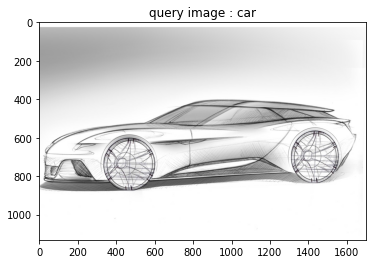

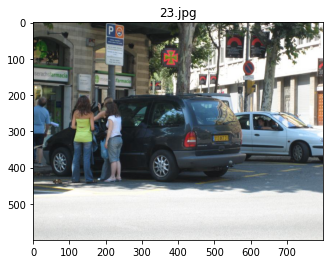

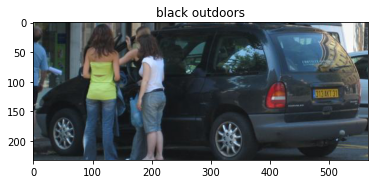

In [17]:
# lets visualize some data in object attributes dataset 
SKETCHES_PATH = '/home/trevant/DL4CV/project_datasets/imagenet-sketch'

data_index = 15

data_point = ATTRIBUTES_DATASET[data_index]

x = data_point['region']['x']
y = data_point['region']['y']
h = data_point['region']['h']
w = data_point['region']['w']

query_text = data_point['query_text']
img_id = data_point['img_id']
query_category = data_point['query_category']

## Directly sketch reading path from datset
query_img_path = os.path.join(SKETCHES_PATH, data_point['query_sketch'])
query_img = Image.open(query_img_path)
show_pil_img(query_img, title=f"query image : {query_category}")
# ----------

img_path = os.path.join(IMG_DIR, str(img_id) + '.jpg')
whole_img = Image.open(img_path)
show_pil_img(whole_img, str(img_id) + '.jpg')

region_area = (x, y, x+w, y+h) # left, top, right, bottom
cropped_img = whole_img.crop(region_area)
show_pil_img(cropped_img, query_text)

## Create train/test split

In [1]:
import json
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

# loading dataset
attributes_sbir_dataset_path = '../data/dlcv_project_attributes_dataset_large.json'
attributes_sbir_dataset_path_train = '../data/dlcv_project_attributes_dataset_large_train.json'
attributes_sbir_dataset_path_val = '../data/dlcv_project_attributes_dataset_large_val.json'

with open(attributes_sbir_dataset_path, 'r') as fp:
    ATTRIBUTES_DATASET = json.load(fp)

print(len(ATTRIBUTES_DATASET))

89910


In [2]:
# shuffling randomly then taking fitst 5k for validation and rest for training
random.shuffle(ATTRIBUTES_DATASET)
VAL_LENGTH = 5000

ATTRIBUTES_DATASET_VAL = ATTRIBUTES_DATASET[:VAL_LENGTH]
ATTRIBUTES_DATASET_TRAIN = ATTRIBUTES_DATASET[VAL_LENGTH:]

# saving attribute dataset train/val splits
with open(attributes_sbir_dataset_path_train, 'w') as fp:
    json.dump(ATTRIBUTES_DATASET_TRAIN, fp, indent=4)

with open(attributes_sbir_dataset_path_val, 'w') as fp:
    json.dump(ATTRIBUTES_DATASET_VAL, fp, indent=4)